# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Define an empty list to hold response information
city_data = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for city in cities: 
    query_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"

    response = requests.get(query_url).json()

# Try to grab the city's information if available
    try: 
        city_data.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])   
    
    # Log the url, record, and set numbers
        print(f"Processing Record {record_count} of Set {set_count} | {response['name']}")
    # Add 1 to the record count
        record_count += 1

    except:
        print("City not found. Skipping...")
        set_count += 1
        record_count = 1
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Saint-Philippe
City not found. Skipping...
Processing Record 1 of Set 2 | Kieta
Processing Record 2 of Set 2 | Egvekinot
Processing Record 3 of Set 2 | Kurchum
Processing Record 4 of Set 2 | Port Elizabeth
Processing Record 5 of Set 2 | Rovaniemi
Processing Record 6 of Set 2 | Chui
Processing Record 7 of Set 2 | Zhigansk
Processing Record 8 of Set 2 | Punta Arenas
Processing Record 9 of Set 2 | Castro
Processing Record 10 of Set 2 | Ribeira Grande
Processing Record 11 of Set 2 | Vaini
Processing Record 12 of Set 2 | Hobart
Processing Record 13 of Set 2 | Muros
Processing Record 14 of Set 2 | Staraya Mayna
Processing Record 15 of Set 2 | Rikitea
Processing Record 16 of Set 2 | Rolla
Processing Record 17 of Set 2 | Mount Isa
Processing Record 18 of Set 2 | Puerto Ayora
Processing Record 19 of Set 2 | San Patricio
Processing Record 20 of Set 2 | Vardø
Processing Record 21 of Set 2 | Atuona
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
citys_dict = {
    'City': city_data,
    'Latitude' : lat,
    'Longitude' : lng,
    'Max Temperature (°C)': max_temp,
    'Humidity (%)': humidity,
    'Cloudiness (%)': cloudiness,
    'Wind Speed (MPH)': wind_speed,
    'Country': country,
    'Date': date
 }

city_data_df = pd.DataFrame(citys_dict)
city_data_df.head()

,City,Latitude,Longitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
0,Saint-Philippe,-21.3585,55.7679,78.39,77,37,9.62,RE,1672246924
1,Kieta,-6.2167,155.6333,77.81,79,98,5.55,PG,1672246927
2,Egvekinot,66.3167,-179.1667,-16.04,84,1,10.18,RU,1672246927
3,Kurchum,48.5722,83.6542,1.35,85,99,2.75,KZ,1672246928
4,Port Elizabeth,-33.9180,25.5701,73.09,89,1,5.99,ZA,1672246928


In [5]:
#  Display sample data
city_data_df.count

<bound method DataFrame.count of                City  Latitude  Longitude  Max Temperature (°C)  Humidity (%)  \
0    Saint-Philippe  -21.3585    55.7679                 78.39            77   
1             Kieta   -6.2167   155.6333                 77.81            79   
2         Egvekinot   66.3167  -179.1667                -16.04            84   
3           Kurchum   48.5722    83.6542                  1.35            85   
4    Port Elizabeth  -33.9180    25.5701                 73.09            89   
..              ...       ...        ...                   ...           ...   
535             Eyl    7.9803    49.8164                 76.19            70   
536       Panlaitan   12.1191   119.8486                 80.26            72   
537         Udarnyy   54.3409    42.8611                 24.30            96   
538       Bonavista   48.6499   -53.1147                 25.00            61   
539        Necochea  -38.5473   -58.7368                 67.59            39   

     C

In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
City_ID,,,,,,,,,
0,Saint-Philippe,-21.3585,55.7679,78.39,77,37,9.62,RE,1672246924
1,Kieta,-6.2167,155.6333,77.81,79,98,5.55,PG,1672246927
2,Egvekinot,66.3167,-179.1667,-16.04,84,1,10.18,RU,1672246927
3,Kurchum,48.5722,83.6542,1.35,85,99,2.75,KZ,1672246928
4,Port Elizabeth,-33.9180,25.5701,73.09,89,1,5.99,ZA,1672246928


In [8]:
cleaned_city_df = city_data_df.loc[city_data_df['Humidity (%)'] <= 100]
cleaned_city_df

,City,Latitude,Longitude,Max Temperature (°C),Humidity (%),Cloudiness (%),Wind Speed (MPH),Country,Date
City_ID,,,,,,,,,
0,Saint-Philippe,-21.3585,55.7679,78.39,77,37,9.62,RE,1672246924
1,Kieta,-6.2167,155.6333,77.81,79,98,5.55,PG,1672246927
2,Egvekinot,66.3167,-179.1667,-16.04,84,1,10.18,RU,1672246927
3,Kurchum,48.5722,83.6542,1.35,85,99,2.75,KZ,1672246928
4,Port Elizabeth,-33.9180,25.5701,73.09,89,1,5.99,ZA,1672246928
...,...,...,...,...,...,...,...,...,...
535,Eyl,7.9803,49.8164,76.19,70,49,17.94,SO,1672247160
536,Panlaitan,12.1191,119.8486,80.26,72,100,6.38,PH,1672247160
537,Udarnyy,54.3409,42.8611,24.30,96,100,5.79,RU,1672247161


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

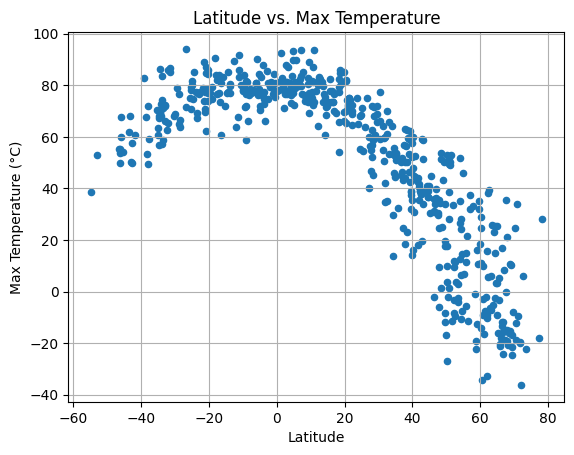

In [9]:
# Plot the scatter plot that shows the relation between latitude and max temperature
cleaned_city_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', 
                     title=f'Latitude vs. Max Temperature')
                    
              
plt.grid()
# Save the figure
plt.savefig("output_data/Lat Vs Temp Plot.png")
# Show plot
plt.show()

#### Latitude Vs. Humidity

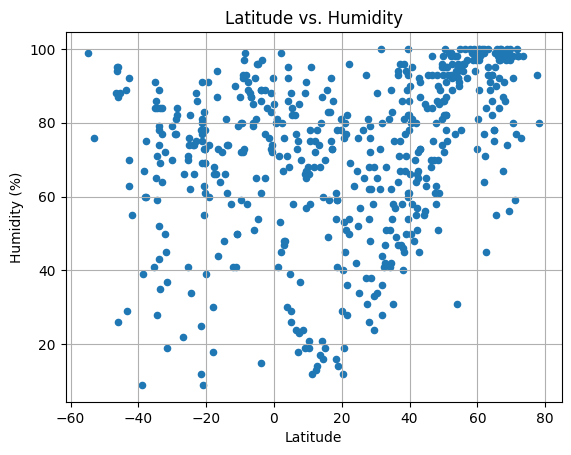

In [10]:
# Plot the scatter plot that shows the relation between latitude and humidity
cleaned_city_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', 
                       title=f'Latitude vs. Humidity')
plt.grid()
# Save the figure
plt.savefig("output_data/Lat Vs Humidity Plot.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

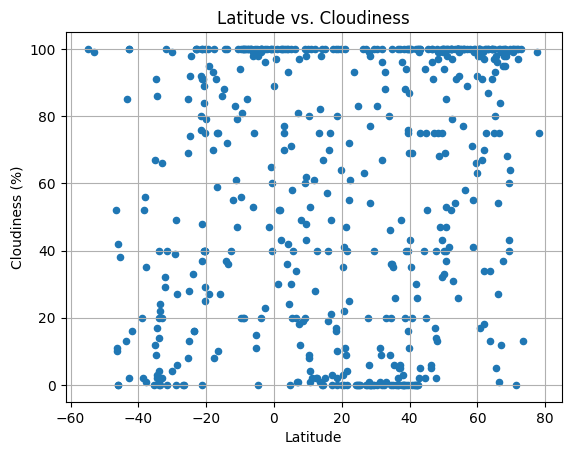

In [11]:
# Plot the scatter plot that shows the relation between latitude and cloudiness
cleaned_city_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', 
                       title=f'Latitude vs. Cloudiness')
plt.grid()
# Save the figure
plt.savefig("output_data/Lat Vs Cloudiness Plot.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

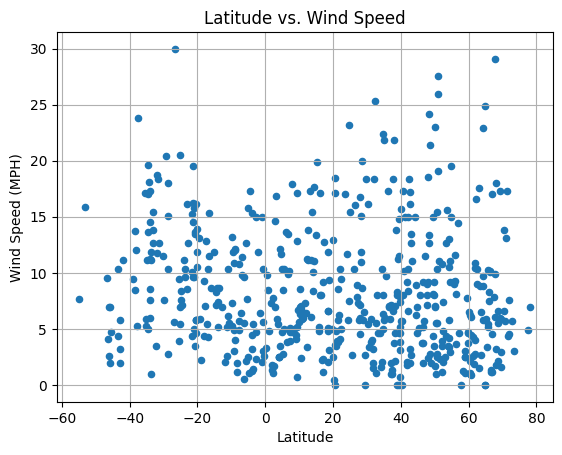

In [12]:
# Plot the scatter plot that shows the relation between latitude and max temperature
cleaned_city_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', 
                       title=f'Latitude vs. Wind Speed')
plt.grid()
# Save the figure
plt.savefig("output_data/Lat Vs Wind Speed Plot.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
nor_hem_df = cleaned_city_df[cleaned_city_df["Latitude"]>0]
sth_hem_df = cleaned_city_df[cleaned_city_df["Latitude"]<0]

###  Temperature vs. Latitude Linear Regression Plot

The r-squared is 0.7898496358977386
The linear regression model is y = -1.44x + 96.0


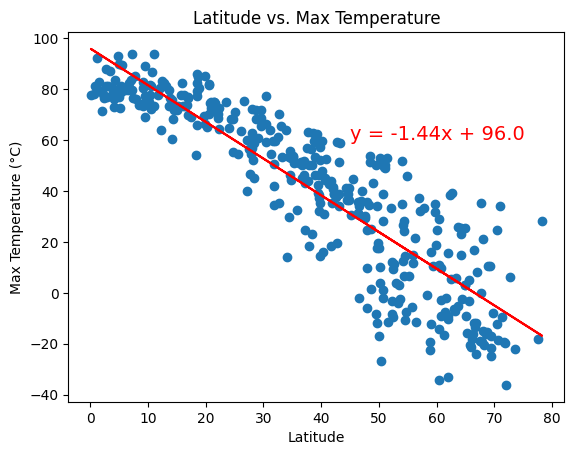

In [14]:
# Plot the linear regression model between latitude and max temperature in the northern hemisphere
nor_hem_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', title='Latitude vs. Max Temperature')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(nor_hem_df['Latitude'], nor_hem_df['Max Temperature (°C)'])
regress_values = nor_hem_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nor_hem_df['Latitude'], nor_hem_df['Max Temperature (°C)'])
plt.plot(nor_hem_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq, (45, 60),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

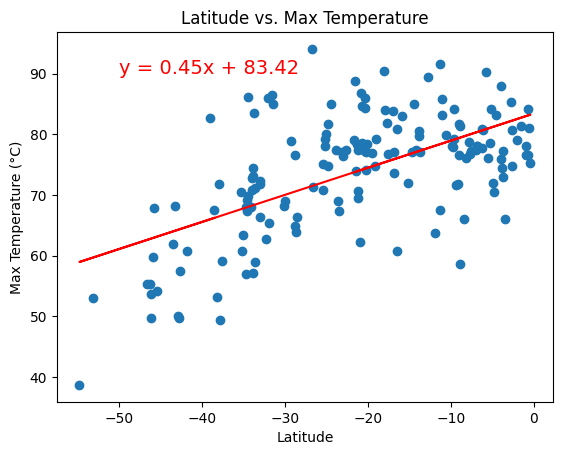

The r-squared is 0.36214915407974
The linear regression model is y = 0.45x + 83.42


In [15]:
# Plot the linear regression model between latitude and max temperature in the southern hemisphere
sth_hem_df.plot(kind='scatter', x='Latitude', y='Max Temperature (°C)', title='Latitude vs. Max Temperature')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sth_hem_df['Latitude'], sth_hem_df['Max Temperature (°C)'])
regress_values = sth_hem_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sth_hem_df['Latitude'], sth_hem_df['Max Temperature (°C)'])
plt.plot(sth_hem_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=14,color="red")
plt.show()

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is 0.2850061255411974
The linear regression model is y = 0.6x + 50.03


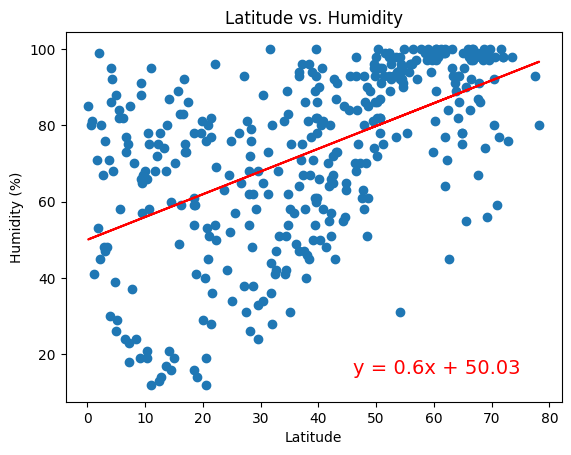

In [16]:
# Plot the linear regression model between latitude and humidity in the northern hemisphere
nor_hem_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Latitude vs. Humidity')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(nor_hem_df['Latitude'], nor_hem_df['Humidity (%)'])
regress_values = nor_hem_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nor_hem_df['Latitude'], nor_hem_df['Humidity (%)'])
plt.plot(nor_hem_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(46,15),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

The r-squared is 0.020641305623211134
The linear regression model is y = 0.22x + 74.48


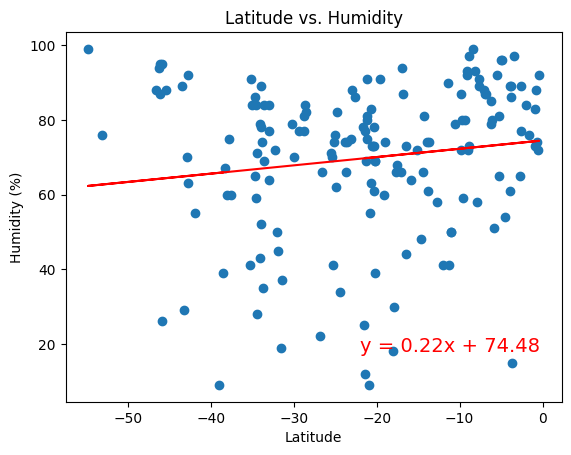

In [17]:
# Plot the linear regression model between latitude and humidity in the southern hemisphere
sth_hem_df.plot(kind='scatter', x='Latitude', y='Humidity (%)', title='Latitude vs. Humidity')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sth_hem_df['Latitude'], sth_hem_df['Humidity (%)'])
regress_values = sth_hem_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sth_hem_df['Latitude'], sth_hem_df['Humidity (%)'])
plt.plot(sth_hem_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,18),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is 0.08899374774030082
The linear regression model is y = 0.57x + 35.97


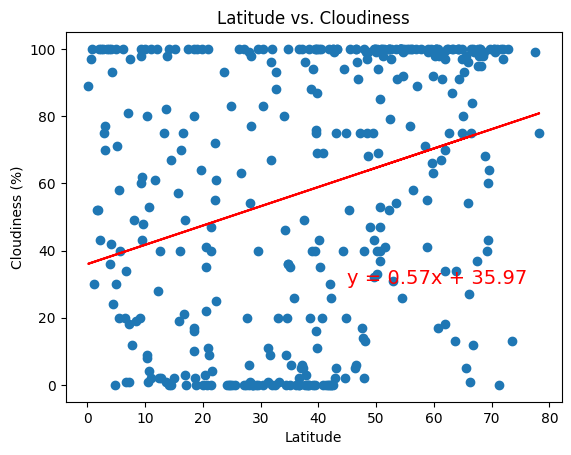

In [18]:
# Plot the linear regression model between latitude and cloudiness in the northern hemisphere
nor_hem_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Latitude vs. Cloudiness')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(nor_hem_df['Latitude'], nor_hem_df['Cloudiness (%)'])
regress_values = nor_hem_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nor_hem_df['Latitude'], nor_hem_df['Cloudiness (%)'])
plt.plot(nor_hem_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

The r-squared is 0.18346705915282202
The linear regression model is y = 1.21x + 82.59


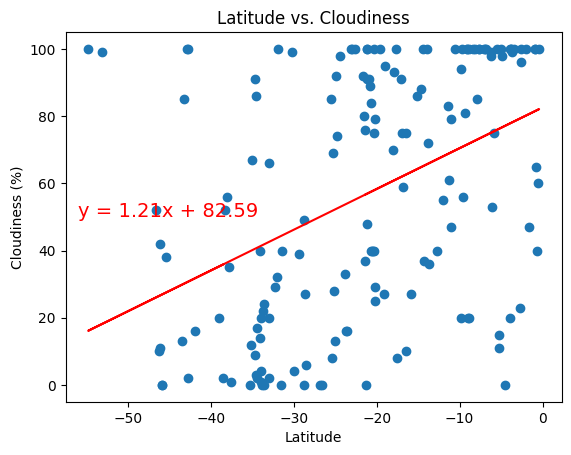

In [19]:
# Plot the linear regression model between latitude and cloudiness in the southern hemisphere
sth_hem_df.plot(kind='scatter', x='Latitude', y='Cloudiness (%)', title='Latitude vs. Cloudiness')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sth_hem_df['Latitude'], sth_hem_df['Cloudiness (%)'])
regress_values = sth_hem_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sth_hem_df['Latitude'], sth_hem_df['Cloudiness (%)'])
plt.plot(sth_hem_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-56,50),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is 0.00011291248806120285
The linear regression model is y = -0.0x + 7.99


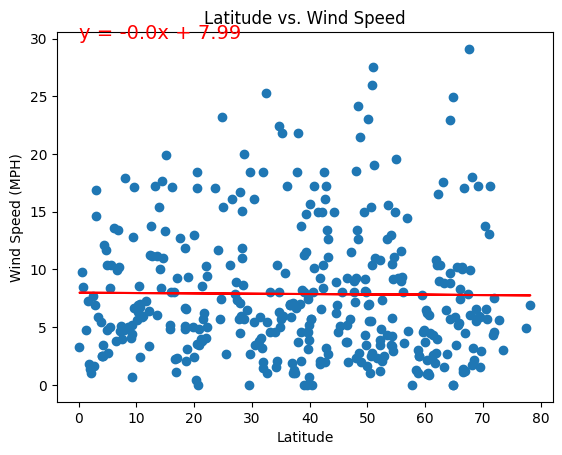

In [20]:
# Plot the linear regression model between latitude and wind speed in the northern hemisphere
nor_hem_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', title='Latitude vs. Wind Speed')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(nor_hem_df['Latitude'], nor_hem_df['Wind Speed (MPH)'])
regress_values = nor_hem_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nor_hem_df['Latitude'], nor_hem_df['Wind Speed (MPH)'])
plt.plot(nor_hem_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

The r-squared is 0.04163181304762945
The linear regression model is y = -0.08x + 7.4


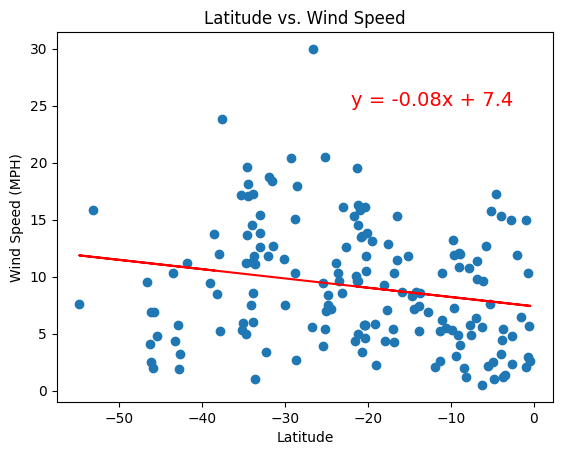

In [21]:
# Plot the linear regression model between latitude and wind speed in the southern hemisphere
sth_hem_df.plot(kind='scatter', x='Latitude', y='Wind Speed (MPH)', title='Latitude vs. Wind Speed')

# Find the linear regression model and print it to the scatter plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(sth_hem_df['Latitude'], sth_hem_df['Wind Speed (MPH)'])
regress_values = sth_hem_df['Latitude'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(sth_hem_df['Latitude'], sth_hem_df['Wind Speed (MPH)'])
plt.plot(sth_hem_df['Latitude'],regress_values,"r-")
plt.annotate(line_eq,(-22,25),fontsize=14,color="red")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

**Discussion about the linear relationship:** YOUR RESPONSE HERE